A study of earthquakes in USA (1980-2020)

In [59]:
%matplotlib notebook

In [60]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import time
import copy
from datetime import datetime
from config import gkey
gmaps.configure(api_key=gkey)


In [61]:
#Read in the us large quakes file
us_csv="output_data/large_quakes_all.csv"
large_quakes=pd.read_csv(us_csv)
#Isolating largest quakes in USA
large_quakes_us = large_quakes.loc[large_quakes['Country']=="US"]
print(len(large_quakes_us))


26


In [62]:
# Configure gmaps od large quakes in USA
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations and convert magnitude to float
locations = large_quakes_us[["Lat", "Lng"]]
magnitude = large_quakes_us["Mag"].astype(float)

 
# Using the template add the earthquake marks to the gmap
info_box_template = """
<dl>
<dt>Place</dt><dd>{Place}</dd>
<dt>Mag</dt><dd>{Mag}</dd>
</dl>
"""
# Store the DataFrame Row
large_quake_info = [info_box_template.format(**row) for index, row in large_quakes_us.iterrows()]

In [63]:
fig = gmaps.figure()
# Create marker layer
markers = gmaps.marker_layer(locations, info_box_content=large_quake_info)

# Add the layer to the map
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
#Combining all quakes of magnitude > 7
data_list= ["output_data/large_quakes_all.csv",
       "output_data/strong_quakes_all.csv",
       "output_data/medium_quakes_all.csv"]
dfs = []
for filename in data_list:
    df= pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)

# Concatenate all data into one DataFrame
allquakes = pd.concat(dfs, ignore_index=True)
print(len(allquakes))
del allquakes['Unnamed: 0']
allquakes.head()

67584


,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country
0,43.530,146.753,44.0,7.0,754,Kuril Islands,1980-02-23 05:51:03.200,2,23,1980,RU
1,-12.410,166.381,33.0,7.5,865,Santa Cruz Islands,1980-07-08 23:19:19.800,7,8,1980,SB
2,-12.525,165.916,33.0,7.9,960,Santa Cruz Islands,1980-07-17 19:42:23.200,7,17,1980,SB
3,36.195,1.354,10.0,7.3,820,northern Algeria,1980-10-10 12:25:23.500,10,10,1980,DZ
4,-21.890,169.853,33.0,7.2,798,southeast of the Loyalty Islands,1980-10-25 11:00:05.100,10,25,1980,NC


In [65]:
#Get the date info from other columns
allquakes['Date'] = allquakes.apply(lambda x: datetime(
                              x['Year'], x['Month'], x['Day']), axis=1)
allquakes.sort_values(by='Date')
allquakes.head()

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country,Date
0,43.530,146.753,44.0,7.0,754,Kuril Islands,1980-02-23 05:51:03.200,2,23,1980,RU,1980-02-23
1,-12.410,166.381,33.0,7.5,865,Santa Cruz Islands,1980-07-08 23:19:19.800,7,8,1980,SB,1980-07-08
2,-12.525,165.916,33.0,7.9,960,Santa Cruz Islands,1980-07-17 19:42:23.200,7,17,1980,SB,1980-07-17
3,36.195,1.354,10.0,7.3,820,northern Algeria,1980-10-10 12:25:23.500,10,10,1980,DZ,1980-10-10
4,-21.890,169.853,33.0,7.2,798,southeast of the Loyalty Islands,1980-10-25 11:00:05.100,10,25,1980,NC,1980-10-25


In [66]:
#Pick columns required to plot
columns = ['Date', 'Mag']
#From entire dataframe isolate US and reduce columns
quakes_df = allquakes.loc[allquakes["Country"] == "US", columns]
print(f'Number of quakes in US in last 40 years :{len(quakes_df)}')
#Set index as date to plot
quakes_df.set_index('Date', inplace=True) 
quakes_df.head()


Number of quakes in US in last 40 years :2492


,Mag
Date,
1980-11-08,7.2
1986-05-07,8.0
1987-11-30,7.9
1988-03-06,7.8
1989-09-04,7.0


<IPython.core.display.Javascript object>


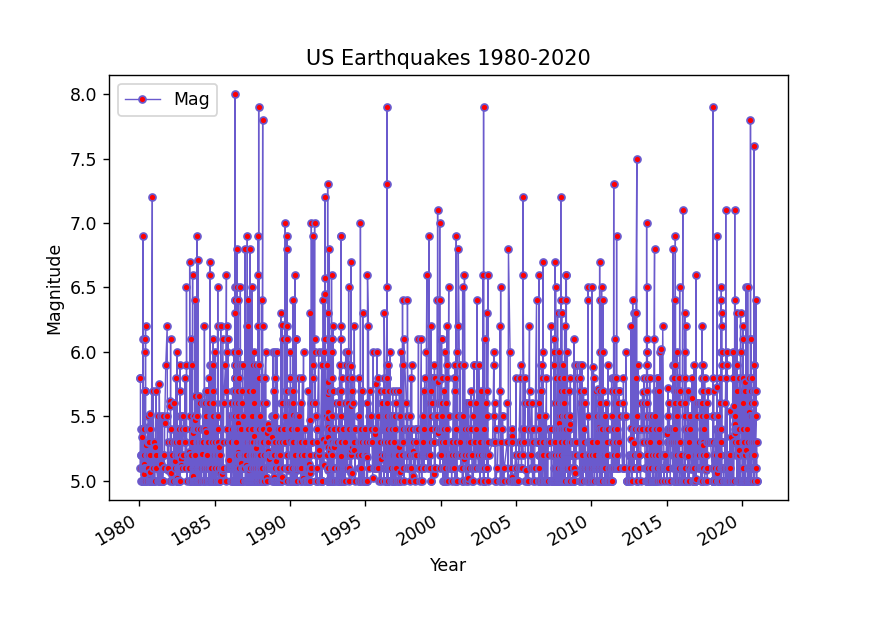

<AxesSubplot:xlabel='Date'>

In [67]:
#Plot the graph by date 
quakes_df.plot(marker='.',
                      ms = 8, mfc = 'r',
                      figsize=(7,5), 
                      linewidth=0.8, 
                      color='slateblue')

In [68]:
plt.title("US Earthquakes 1980-2020")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.plot()

[]

In [71]:
# us_places = large_quakes_us[['Year', 'Mag', 'Place']]
# grouped_df = us_places.groupby('Place').count()
# quakes_AK=quakes_df.Place.str.count(r'[Alaska]').sum()
# print(f"The total quakes in Alaska years(1980-2020) : {quakes_AK}")


In [72]:
#Earthquakes in US during the year 1986
quakes_all_8489=pd.read_csv("output_data/quakes_all_8489.csv")
quakes_us_8489=quakes_all_8489.loc[quakes_all_8489['Country']=='US']

quakes_8489= copy.deepcopy(quakes_us_8489)
quakes_8489['Date']=pd.to_datetime(quakes_us_8489['Time']).dt.date
quakes_8489['Date'] = quakes_8489['Date'].astype('datetime64')
quakes_df = quakes_8489[(quakes_8489['Date'] > '1986-01-01') & (quakes_8489['Date']< '1987-01-01')]
print(len(quakes_df))
quakes_df.head()

171


,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country,Date
3567,51.553000,-173.109,33.000,5.6,482,"Andreanof Islands, Aleutian Islands, Alaska",1986-01-18 01:59:01.650,1,18,1986,US,1986-01-18
3589,36.804333,-121.285,8.153,5.5,465,Central California,1986-01-26 19:20:50.950,1,26,1986,US,1986-01-26
3605,43.601000,-127.339,10.000,5.3,432,off the coast of Oregon,1986-01-30 07:15:33.500,1,30,1986,US,1986-01-30
3612,41.650000,-81.162,10.000,5.0,385,Ohio,1986-01-31 16:46:43.330,1,31,1986,US,1986-01-31
3628,67.898000,-155.994,33.000,5.1,400,northern Alaska,1986-02-06 15:14:58.360,2,6,1986,US,1986-02-06


In [73]:
# Drill down into data for year 1986 
quakes_df = quakes_8489[(quakes_8489['Date'] > '1986-04-20') & (quakes_8489['Date']< '1986-05-15')]
quakes_df.groupby('Place').count()


,Lat,Lng,Depth,Mag,Sig,Time,Month,Day,Year,Country,Date
Place,,,,,,,,,,,
"Andreanof Islands, Aleutian Islands, Alaska",74,74,74,74,74,74,74,74,74,74,74
"Hawaii region, Hawaii",1,1,1,1,1,1,1,1,1,1,1


<IPython.core.display.Javascript object>


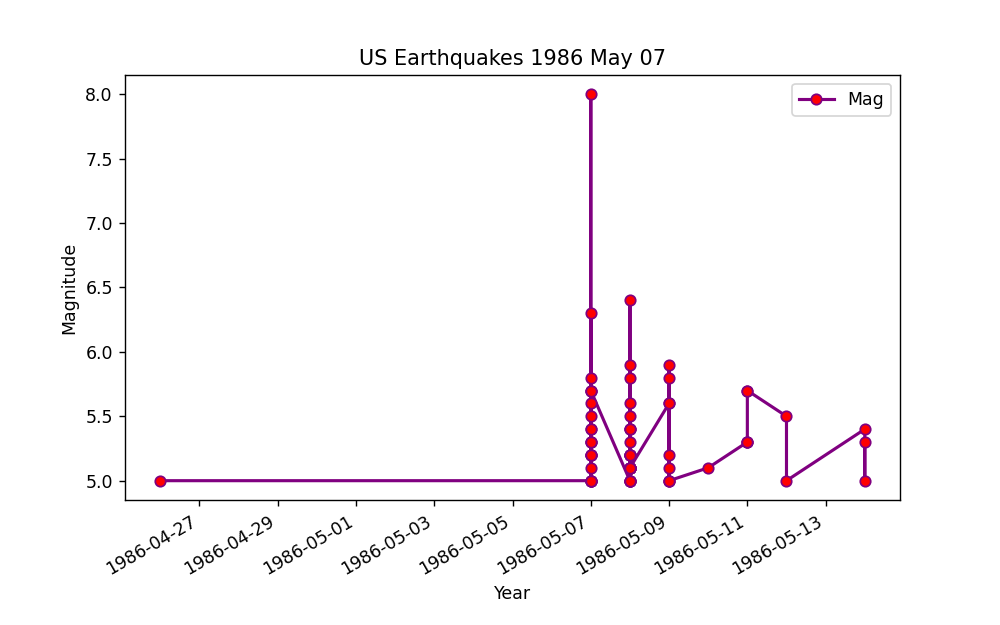

In [74]:
columns = ['Date', 'Mag']
quakes_df[['Date', 'Mag']].set_index('Date').plot(figsize=(8,5),
                                     marker='.',
                                     ms = 12, mfc = 'r',
                                     linewidth=1.8, 
                                     color='purple')
plt.show()

In [77]:
plt.title("US Earthquakes 1986 May 07")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.plot()

[]

In [78]:
eq_df = quakes_8489.loc[quakes_8489['Date'] == '1986-05-07']
print("Earthquakes that occured on May 7, 1986")
eq_df.groupby('Place').count()

Earthquakes that occured on May 7, 1986


,Lat,Lng,Depth,Mag,Sig,Time,Month,Day,Year,Country,Date
Place,,,,,,,,,,,
"Andreanof Islands, Aleutian Islands, Alaska",23,23,23,23,23,23,23,23,23,23,23


Facts : Between May 7 and May 15 of 1986 there were 74 quakes. on May 7 1986 alone there were 23 quakes of magnitude 5.0+ on Andreanof Islands, Aleutian Islands, Alaska. The largest of the quakes that hit in 40 years is on May 07 1986 of magnitude 8.0

The Aleutian arc is a seismically active region, evidenced by the many moderate to large earthquakes occurring each year. Since 1900, this region has witnessed twelve large earthquakes (M>7.5) including the May 7, 1986 M8.0 Andreanof Islands, the June 10, 1996 M7.9 Andreanof Islands, and the November 17, 2003 M7.8 Rat Islands earthquakes.

Source: https://earthquake.usgs.gov/earthquakes/eventpage/official19570309142233_30/region-info